In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import yadage_wrapper

In [6]:
data = yadage_wrapper.run_weinberg_yadage('/srv/workerdata/workdirs/from_wrapper', backend = 'celery')

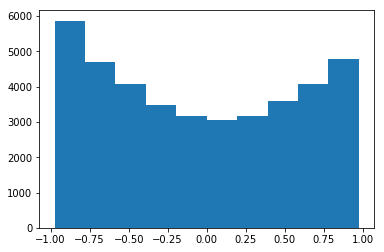

In [9]:
_,_,_ = plt.hist(data)